In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import networkx as nx

In [2]:
!ls

Untitled.ipynb                       china_082019_2_tweets_csv_hashed.csv
china_082019_1_tweets_csv_hashed.csv china_082019_2_tweets_csv_hashed.zip
china_082019_1_tweets_csv_hashed.zip china_082019_2_users_csv_hashed.csv
china_082019_1_users_csv_hashed.csv  china_082019_2_users_csv_hashed.zip
china_082019_1_users_csv_hashed.zip  untitled.txt


In [2]:
user_1 = pd.read_csv('china_082019_1_users_csv_hashed.csv', )
tweet_1 = pd.read_csv('china_082019_1_tweets_csv_hashed.csv')

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (15,19,30) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
tweet_1.head()

,tweetid,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,...,latitude,longitude,quote_count,reply_count,like_count,retweet_count,hashtags,urls,user_mentions,poll_choices
0,436306424587890688,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,1.0,0.0,NaN,NaN,[443196382],NaN
1,582682975969624064,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,52.0,[],['http://goo.gl/32K38q'],[],NaN
2,582997936541278208,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],[],[116351908],NaN
3,580404049901670400,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,[],['http://goo.gl/iC1GM9'],[],NaN
4,199007241142149121,206027550,The Flecha,nessniven,Republic of Korea,When you see Jair Bolsonaro and his program of...,NaN,100847,31752,2010-10-22,...,absent,absent,0.0,0.0,0.0,0.0,NaN,['http://migre.me/8Ycqm'],NaN,NaN


In [5]:
sample = tweet_1[['tweetid','tweet_text']]

In [6]:
sample['troll'] = '1'

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
sample = sample[:2000]
sample.loc[1000:2000,'troll'] = 0

/Users/yhhsu/Anaconda/anaconda/envs/ph2t/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [14]:
sample.to_csv('sample.csv',index=False)

In [4]:
user_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 10 columns):
userid                      744 non-null object
user_display_name           744 non-null object
user_screen_name            744 non-null object
user_reported_location      182 non-null object
user_profile_description    189 non-null object
user_profile_url            14 non-null object
follower_count              744 non-null int64
following_count             744 non-null int64
account_creation_date       744 non-null object
account_language            744 non-null object
dtypes: int64(2), object(8)
memory usage: 58.2+ KB


In [5]:
user_1.head()

,userid,user_display_name,user_screen_name,user_reported_location,user_profile_description,user_profile_url,follower_count,following_count,account_creation_date,account_language
0,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,vMm2zemFOF7kmXoDyX24Bo+TorqhNutpZlATYyxsE=,NaN,NaN,NaN,1,52,2017-08-30,zh-cn
1,919755217121316864,ailaiyi5,wuming11xia,NaN,NaN,NaN,0,0,2017-10-16,zh-cn
2,747292706536226816,牛小牛,gurevadona88,NaN,NaN,NaN,23949,52,2016-06-27,zh-cn
3,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,q2SMGvHasu+nugbpNMDCjr2qlZp3FCiGYDLht+gW5pw=,NaN,NaN,NaN,17,34,2016-08-08,es
4,907348345563303940,lishuishi,lishuishi,NaN,NaN,NaN,0,0,2017-09-11,zh-tw


In [9]:
tweet_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1906831 entries, 0 to 1906830
Data columns (total 31 columns):
tweetid                     int64
userid                      object
user_display_name           object
user_screen_name            object
user_reported_location      object
user_profile_description    object
user_profile_url            object
follower_count              int64
following_count             int64
account_creation_date       object
account_language            object
tweet_language              object
tweet_text                  object
tweet_time                  object
tweet_client_name           object
in_reply_to_userid          object
in_reply_to_tweetid         float64
quoted_tweet_tweetid        float64
is_retweet                  bool
retweet_userid              object
retweet_tweetid             float64
latitude                    object
longitude                   object
quote_count                 float64
reply_count                 float64
like_count  

In [15]:
len(tweet_1.userid.unique())

699

In [13]:
for key in tweet_1:
    print(tweet_1[key].value_counts().head())

852517322396901376    1
937461842515030016    1
602889330374385665    1
928768850161733632    1
838029634851721216    1
Name: tweetid, dtype: int64
769790067183190016    268284
206027550             220664
620912741             183862
718766229700227072    177415
791015242448850945    161905
Name: userid, dtype: int64
阿丽木琴          268284
The Flecha    220664
曲剑明           183862
春天里           177415
Klausv        161905
Name: user_display_name, dtype: int64
SamanthxBerg     268284
nessniven        220664
qujianming1      183862
RanvijaySowle    177415
klausv02         161905
Name: user_screen_name, dtype: int64
Los Angeles, CA      303247
Republic of Korea    220664
纽约布朗克斯               183862
Portland, OR         177415
Manhattan, NY        168019
Name: user_reported_location, dtype: int64
我是一个小小的石头                                                                                                                                                       268284
When you see Jair Bolsonaro an

In [36]:
tweet_number = tweet_1.groupby('user_display_name').tweetid.count().sort_values(ascending=False)
tweet_number.head(20)

user_display_name
阿丽木琴                                            268284
The Flecha                                      220664
曲剑明                                             183862
春天里                                             177415
Klausv                                          161905
炫彩                                              157467
浪冲                                              118993
雅儿                                               88709
Sanro                                            38472
emiliya naum                                     29132
同人泰                                              23494
24hcloud                                         20405
依萍                                               16101
QVr+qYj7OTUbWgxNe8gbFgqkfnPKR6KZQFkt3pOmA=       14961
爱德森                                              12337
BoswinkSyri00                                    11932
如果                                               10445
sivalevleha                                    

In [64]:
most_active_account = list(tweet_1.groupby('userid').tweetid.count().sort_values(ascending=False).head(10).index)

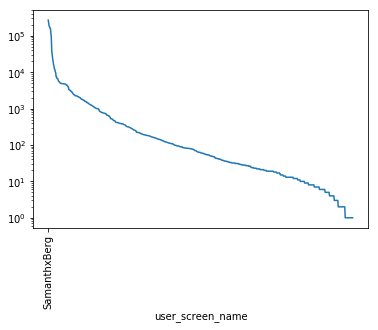

In [53]:
tweet_1.groupby('user_screen_name').tweetid.count().sort_values(ascending=False).plot(logy=True,rot=90, xticks=[0])

In [7]:
tweet_1['tweet_time'] = pd.to_datetime(tweet_1.tweet_time)

In [67]:
type(date_before)

datetime.date

In [8]:
import datetime
date_before = datetime.date.today() - datetime.timedelta(days=60)
# mask1 = tweet_1.userid.isin(most_active_account)
mask2 = tweet_1.tweet_time > "2019-01-01"
tweets_recent_activity = tweet_1[mask2]

In [74]:
tweets_recent_activity.sort_values(by=['tweet_time'], ascending=False).head().T

,1677732,1554136,1536368,1265324,1349702
tweetid,1148411090834866176,1148411111596670976,1148411133167931392,1148056160215261184,1148056002643685376
userid,363345298,363345298,363345298,363345298,363345298
user_display_name,emiliya naum,emiliya naum,emiliya naum,emiliya naum,emiliya naum
user_screen_name,emiliya_naum,emiliya_naum,emiliya_naum,emiliya_naum,emiliya_naum
user_reported_location,NaN,NaN,NaN,NaN,NaN
user_profile_description,emiliya naum,emiliya naum,emiliya naum,emiliya naum,emiliya naum
user_profile_url,NaN,NaN,NaN,NaN,NaN
follower_count,17562,17562,17562,17562,17562
following_count,9050,9050,9050,9050,9050
account_creation_date,2011-08-27,2011-08-27,2011-08-27,2011-08-27,2011-08-27


In [9]:
tweets_recent_activity.head().T

,550,1380,1864,2378,2380
tweetid,1118690149989109760,1107433338971652096,1145785094612946946,1098390527152541696,1120715895397994496
userid,828817384827875330,769790067183190016,103804719,769790067183190016,769790067183190016
user_display_name,vdfxvgcvd8,阿丽木琴,摩天轮约炮平台微信xdmtlove765,阿丽木琴,阿丽木琴
user_screen_name,vdfxvgcvd8,SamanthxBerg,ronetaper,SamanthxBerg,SamanthxBerg
user_reported_location,"Nasushiobara-shi, Tochigi",NaN,USA,NaN,NaN
user_profile_description,NaN,我是一个小小的石头,Ronetaper,我是一个小小的石头,我是一个小小的石头
user_profile_url,NaN,NaN,NaN,NaN,NaN
follower_count,11401,13468,13268,13468,13468
following_count,11807,14606,61,14606,14606
account_creation_date,2017-02-07,2016-08-28,2010-01-11,2016-08-28,2016-08-28


In [51]:
# non direction, innter retweet
user = [str(i) for i in list(tweets_recent_activity.userid.unique())]
retweet = tweets_recent_activity[tweets_recent_activity.is_retweet == True]
inner_retweet = retweet[retweet.retweet_userid.isin(user)]


node = [str(i) for i in list(inner_retweet.userid.unique())]
edge = [(str(row[1]['userid']), str(row[1]['retweet_userid'])) for row in inner_retweet.iterrows()]

In [52]:
G = nx.Graph()
G.add_nodes_from(node)
G.add_edges_from(edge)

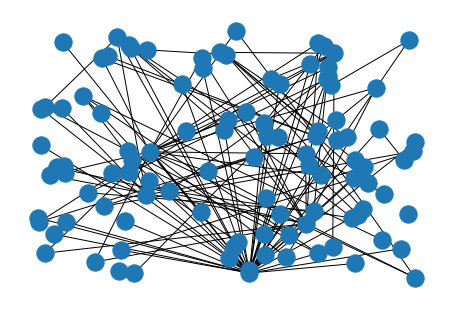

In [55]:
nx.draw_random(G, with_labels=False, font_weight='bold')

In [ ]:
edge_weight_dict = {}
for e in edge:a
    if e in edge_weight:
        edge_weight[e] += 1
    else:
        edge_weight[e] = 1
edge_weight = []
for e in edge_weight_dict:
    edge_weight.append((e))

In [ ]:
MG = nx.MultiGraph()


In [ ]:
tweet_1.user_reported_location

In [60]:
pd.DataFrame(tweet_1.groupby('userid').user_reported_location.apply(list))

,user_reported_location
userid,
+QZhlOaSZla7qvedis2xt5rlkrW7PO2Uj+t+11SDhoM=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
+T7y2f4uoN8uwGO1NjnfQHYIdBHA29tp7mKrE2z0to=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
+o9h32dOX2L8AbvB0rdM+j8FcHVaNNcwKMZWJn49tUE=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
+tDWZynsin9nF3PNWStld8JMl7zNLFQP9hnKsFkpngk=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
0BSMkZpPxpPyxjBqkBF8eguPvwUwrAotBOSVzR1SwwY=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
0Mv1uANgsjUtIr9lOR7O3usk6CCfDZ13UUWTzgDo=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
0QqazyXTunGfzxwwYgSMugZH0MxjzwJNck4+lHcKM8M=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
0fXnLDeFG54ElVQbNh1vdO2c5oF8xW3pYuEVG8HNDM=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."
0jDKUXmrsvMu6OhHGrnACplrKC5Oqj1KE0x8m37dYNY=,"[nan, nan, nan, nan, nan, nan, nan, nan, nan, ..."


In [12]:
tweet_1.longitude.value_counts()

absent     1906496
present        335
Name: longitude, dtype: int64

In [11]:
tweet_1.latitude.value_counts()

absent     1906496
present        335
Name: latitude, dtype: int64